$\underline{\textbf{Travail personnel 1 : Kepler et Runge-Kutta 4}}$

On importe les librairies nécéssaires

In [325]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Création de la grille, déclaration des variables et des différents objets dont nous aurons besoin : 

In [330]:
k=2000000 # Nombre de segments dans la grille
dt=1 # Taille du pas en [s]
O=int(k/dt) # Nombre de pas
t=numpy.linspace(0,dt,k) # Création de la grille
y0=0 # Composante y de la distance Terre-Lune initiale en [m]
vy0=1083.434974 # Composante y de la vitesse initiale en [m.s-1]
x0=-3626*10**5 # Composante x de la distance Terre-Lune initiale en [m]
vx0=0 # Composante x de la vitesse initiale en [m.s-1]
u=numpy.array([x0,y0,vx0,vy0]) # Vecteur position-vitesse en fonction du temps , initialisé en t0=0[s]
G=6.67408*10**(-11) # Constante gravitationnelle en [kg.m3.s-1]
mt=5.972*10**(24) # Masse de la Terre en [kg]
ml=7.348*10**(22) # Masse de la Lune en [kg]
M=mt+ml # Masse totale du système Terre-Lune en [kg]
ax0=-mt*G/((x0)**2) # Composante x de l'accélération initiale en [m.s-2]
ay0=0 # Composante y de l'accélération initiale en [m.s-2]
du=numpy.array([vx0,vy0,ax0,ay0]) # Vecteur vitesse-accélération en fonction du temps , initialisé en t0=0
vy=numpy.zeros(O) # Vecteur d'évolution de la composante y de la vitesse en [m.s-1]
y=numpy.zeros(O) # Vecteur d'évolution de la composante y de la position en [m]
vx=numpy.zeros(O) # Vecteur d'évolution de la composante x de la vitesse en [m.s-1]
x=numpy.zeros(O) # Vecteur d'évolution de la composante x de la position en [m]
vx[0]=vx0 # On ajuste la condition initiale
x[0]=x0 # On ajuste la condition initiale
y[0]=y0 # On ajuste la condition initiale 
vy[0]=vy0 # On ajuste la condition initiale 

$\textbf{QUESTION 1}$ 

Afin de travailler dans un repère inertiel, nous nous plaçons dans le centre de masse du système Terre-Lune. Dans ce référentiel, les équation du mouvement de la Terre et de la Lune sont respectivement données par :

$m_t\ddot{\vec{x_t}}=-\frac{Gm_tm_l}{r^2}\vec{u_r}$

$m_l\ddot{\vec{x_l}}=\frac{Gm_tm_l}{r^2}\vec{u_r}$

On définit à présent une fonction reproduisant la méthode itérative de résolution RK4 pour l'équation différentielle d'ordre 2

$$\quad \ddot{\vec{r}}=-\frac{G(m_l+m_t)}{r^3}\vec{r} \quad\quad avec\quad \quad \ddot{\vec{r}}\equiv\ddot{\vec{x_l}}-\ddot{\vec{x_t}}$$ 

décrivant le mouvement relatif de la Lune et de la Terre et ramenée à une équation d'ordre 1 pour le vecteur u. A chaque itération le vecteur u solution de l'équation différentielle et donc ses composantes ( position et vitesse relatives ) sont calculées à la valeur suivante du temps. La fonction retourne les vecteurs donnant les position et vitesse relatives pour chaque valeur du temps appartenant à l'intervalle déterminé par la grille.

En deux dimensions, nous avons écrit :              

$\vec{r}=(x)\vec{u_x}+(y)\vec{u_y} \quad$ pour la position relative, 

$\vec{v}=(vx)\vec{u_x}+(vy)\vec{u_y} \quad$ pour la vitesse relative, et

$\vec{a}=(ax)\vec{u_x}+(ay)\vec{u_y} \quad$ avec 
$\quad ax=-\frac{G(m_t+m_l)}{(\sqrt{x^2+y^2})^3}x \quad (\star)\quad$ et $\quad ay=-\frac{G(m_t+m_l)}{(\sqrt{x^2+y^2})^3}y\quad (\star\star) \quad$ pour l'accélération relative.



La fonction applique Runge-Kutta 4 sur l'équation du=f(u) avec un pas de temps dt=1 où f(u) envoie chaque composante de u sur sa dérivée et les composantes de l'accélération sont remplacées par leurs expressions $(\star)$ et $(\star \star)$ 

Runge-Kutta est appliquée sur chaque composante en même temps, les $\quad k_i ,\quad i=1...4\quad$ sont donc des vecteurs à 4 composantes.

Le vecteur u solution est raffiné à chaque pas de temps, et à chaque pas on introduit dans les composantes des positions, vitesses et accélérations leur valeur instantanée. On introduit ces nouvelles valeurs dans du et on recommence l'opération jusqu'à avoir parcouru toute la grille.

La fonction retourne les vecteurs position, vitesse et accélération ayant pour composantes leur valeur à chaque pas de temps.

In [303]:
def RungeKutta4(du,u,mt,vx,vy,x,y,O,dt):

    for i in range (1,O):
        k1=du
        k2=numpy.array([vx[i-1],vy[i-1],-mt*G*(x[i-1]+dt/2*k1[0])/(((x[i-1]+dt/2*k1[0])**2+(y[i-1]+dt/2*k1[1])**2)**(3/2)),-mt*G*(y[i-1]+dt/2*k1[1])/(((y[i-1]+dt/2*k1[1])**2+(x[i-1]+dt/2*k1[0])**2)**(3/2))])
        k3=numpy.array([vx[i-1],vy[i-1],-mt*G*(x[i-1]+dt/2*k2[0])/(((x[i-1]+dt/2*k2[0])**2+(y[i-1]+dt/2*k2[1])**2)**(3/2)),-mt*G*(y[i-1]+dt/2*k2[1])/(((x[i-1]+dt/2*k2[0])**2+(y[i-1]+dt/2*k2[1])**2)**(3/2))])
        k4=numpy.array([vx[i-1],vy[i-1],-mt*G*(x[i-1]+dt*k3[0])/(((x[i-1]+dt*k3[0])**2+(y[i-1]+dt*k3[1])**2)**(3/2)),-mt*G*(y[i-1]+dt*k3[1])/(((x[i-1]+dt*k3[0])**2+(y[i-1]+dt*k3[1])**2)**(3/2))])
        u= u + dt * (k1+2*k2+2*k3+k4)/6
        x[i]=u[0]
        vx[i]=u[2]
        y[i]=u[1]
        vy[i]=u[3]
        du=numpy.array([vx[i],vy[i],-mt*G*x[i]/(((x[i])**2+(y[i])**2)**(3/2)),-mt*G*y[i]/(((x[i])**2+(y[i])**2)**(3/2))])
    return (x,y,vx,vy)

In [304]:

RungeKutta4(du,u,mt+ml,vx,vy,x,y,O,dt)

(array([ -3.62600000e+08,  -3.62600000e+08,  -3.62600000e+08, ...,
         -1.91659700e+08,  -1.91660580e+08,  -1.91661460e+08]),
 array([  0.00000000e+00,   1.08343497e+03,   2.16686995e+03, ...,
         -3.18815167e+08,  -3.18814582e+08,  -3.18813996e+08]),
 array([  0.00000000e+00,   2.05207391e-03,   5.12085986e-03, ...,
         -8.80230457e+02,  -8.80228954e+02,  -8.80227452e+02]),
 array([ 1083.434974  ,  1083.434974  ,  1083.43497398, ...,   585.5453562 ,
          585.54785521,   585.55035421]))

$\textbf{QUESTION 2 ET 3}$

On calcule le demi grand-axe a en [m] , le demi petit-axe b en [m], l'excentricité e et la période P en jours [j].

Pour cela on extrait le moment t = p [s] auquel la lune a parcouru la moitié supérieure de l'ellipse représentant sa trajectoire. En effet, passé ce lieu, la composante y de sa position deviendra négative et la variable p n'est plus assignée. 
On trouve donc l'expression du demi grand-axe a et de la distance c entre le foyer Terre et le centre de l'ellipse grâce aux relations de symétrie. Ayant ces valeurs , on peut calculer 

- le demi petit-axe : $\quad b=\sqrt{a^2-c^2}$

- l'excentricité : $\quad e=\frac{c}{a}$

La période est donnée par le double du temps mis pour parcourir la moitié de l'ellipse .

In [306]:
for i in range (O):
    if y[i]>0 :
        p=i
l=x[p]
a= (l- x0)/2
c= (l+x0)/2
bsq=a**2-c**2
b=numpy.sqrt(bsq)
e = c/a
Prd=(p/86400)*2
print (a,b,c,e,p,Prd)


383664897.799 383086183.363 21064897.7992 0.0549044176834 1175348 27.20712962962963


Trajectoire de la Lune dans le plan xy

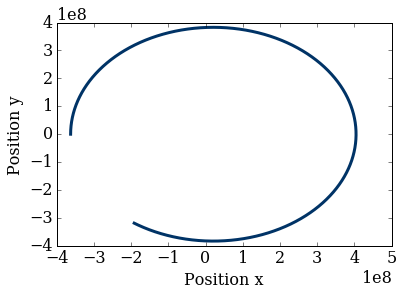

In [305]:
pyplot.plot(x, y, color='#003366', ls='-', lw=3)
pyplot.ylabel('Position y')
pyplot.xlabel('Position x')

$\textbf{Question 4}$

On commence par définir une fonction qui effectue une seule incrémentation dans la méthode de Runge-Kutta

In [331]:
def RungeKutta4Step(du,u,mt,O,dt):
    k1=du
    k2=numpy.array([u[2],u[3],-mt*G*(u[0]+dt/2*k1[0])/(((u[0]+dt/2*k1[0])**2+(u[1]+dt/2*k1[1])**2)**(3/2)),-mt*G*(u[1]+dt/2*k1[1])/(((u[1]+dt/2*k1[1])**2+(u[0]+dt/2*k1[0])**2)**(3/2))])
    k3=numpy.array([u[2],u[3],-mt*G*(u[0]+dt/2*k2[0])/(((u[0]+dt/2*k2[0])**2+(u[1]+dt/2*k2[1])**2)**(3/2)),-mt*G*(u[1]+dt/2*k2[1])/(((u[0]+dt/2*k2[0])**2+(u[1]+dt/2*k2[1])**2)**(3/2))])
    k4=numpy.array([u[2],u[3],-mt*G*(u[0]+dt*k3[0])/(((u[0]+dt*k3[0])**2+(u[1]+dt*k3[1])**2)**(3/2)),-mt*G*(u[1]+dt*k3[1])/(((u[0]+dt*k3[0])**2+(u[1]+dt*k3[1])**2)**(3/2))])
    u= u + dt * (k1+2*k2+2*k3+k4)/6
    du=numpy.array([u[2],u[3],-mt*G*u[0]/(((u[0])**2+(u[1])**2)**(3/2)),-mt*G*u[1]/(((u[0])**2+(u[1])**2)**(3/2))])
    return u,du

On définit une fonction renvoyant la différence entre la solution avec la grille courante et la solution de référence.

In [332]:
def get_diffgrid(u_current, u_fine, dt):

    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

Calcul pour l'ordre de convergence :

In [333]:
r = 2
dt = 100

dt_values2 = numpy.array([dt, r*dt, r**2*dt])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(k/dt) + 1   

    q = numpy.empty((N, 4))# store the value of u related to one grid
    q[0] = numpy.array([x0,y0,vx0,vy0])

    # time loop
    for k in range(N-1):

        q[k+1] = RungeKutta4Step(du,u,mt+ml,O,dt)[0]         ### call euler_step() ###
    u_values2[i] = q
    
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])


diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])


p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));

ValueError: math domain error

$\textbf{QUESTION 5}$

On pose les conditions initiales du nouveau problème.

On réinitialise les vecteurs u et du des positions, vitesses et accélérations de la lune.

In [195]:
k=3000000
O=int(k/dt)
dtb=1
N=86400*14
n=int(N/dtb)

xl0=max(x) # Composante x de la position initiale de la Lune en [m]
yl0=0 # Composante y de la position initiale de la Lune en [m]
vyl0=vy[p] # Composante y de la vitesse initiale de la Lune en [m.s-1]
vxl0=vx[p] # Composante x de la vitesse initiale de la Lune en [m.s-1]
vxa=numpy.zeros(n) # Composante x de la vitesse de l'astéroïde en [m.s-1]
vya=numpy.zeros(n) # Composante y de la vitesse de l'astéroïde en [m.s-1]
xa=numpy.zeros(n) # Composante x de la position de l'astéroïde en [m]
ya=numpy.zeros(n) # Composante y de la position de l'astéroïde en [m]
axa=numpy.zeros(n) # Composante x de l'accélération de l'astéroïde en [m.s-2]
aya=numpy.zeros(n) # Composante y de l'accélération de l'astéroïde en [m.s-2]
xa0=c # Composante x de la position initiale de l'astéroïde en [m]
ya0=0 # Composante y de la position initiale de l'astéroïde en [m]
ya[0]=ya0 # initialisation du vecteur de composantes y de la position
xa[0]=xa0 # initialisation du vecteur de composantes x de la position
vxa0=-500 # Composante x de la vitesse initiale de l'astéroïde en [m.s-1]
vya0=500 # Composante y de la vitesse initiale de l'astéroïde en [m.s-1]
vya[0]=vya0 # initialisation du vecteur de composantes y de la vitesse
vxa[0]=vxa0 # initialisation du vecteur de composantes x de la vitesse
axa0=-(mt)*G*xa0/(((xa0)**2+(ya0)**2))**3/2-(ml)*G*(xa0-xl0)/(((xa0-xl0)**2+(ya0-yl0)**2)**(3/2)) # Composante x de l'accélération initiale de l'astéroïde en [m.s-2]
aya0=0 # Composante y de l'accélération initiale de l'astéroïde en [m.s-2]
aya[0]=aya0 # initialisation du vecteur de composantes y de l'accélération
axa[0]=axa0 # initialisation du vecteur de composantes x de l'accélération
ua=numpy.array([xa0,ya0,vxa0,vya0]) # Vecteur position-vitesse de l'astéroïde initialisé en t=0
dua=numpy.array([vxa0,vya0,axa0,aya0]) # Vecteur vitesse-accélération de l'astéroïde initialisé en t=0



u=numpy.array([x0,y0,vx0,vy0])
ax0=-mt*G/((x0)**2)
du=numpy.array([vx0,vy0,ax0,ay0])
vy=numpy.zeros(O)
y=numpy.zeros(O)
vx=numpy.zeros(O)
x=numpy.zeros(O)
ay=numpy.zeros(O)
ax=numpy.zeros(O)
vx[0]=vx0
x[0]=x0
y[0]=y0
vy[0]=vy0


Comme précédemment, on définit une fonction appliquant la méthode de Runge-Kutta afin de résoudre l'équation du mouvement de l'astéroïde soumis à l'attraction de la Terre et de la Lune :

$$ \left\{
          \begin{array}{ll}
          \ddot{x}=-\frac{m_tG}{(\sqrt{x^2+y^2})^3}x - \frac{m_lG}{(\sqrt{(x-x_l)^2+(y-y_l)^2})^3}(x-x_l)\\
          \ddot{y}=-\frac{m_tG}{(\sqrt{x^2+y^2})^3}y - \frac{m_lG}{(\sqrt{(x-x_l)^2+(y-y_l)^2})^3}(y-y_l)
          \end{array}
   \right.
   $$

In [196]:
def RungeKutta4Lune(du,u,vx,vy,x,y,axla,ayla,xl,yl,w,dt):
    for i in range (1,w):
        k1=du
        k2=numpy.array([vx[i-1],vy[i-1],-mt*G*(x[i-1]+dt/2*k1[0])/(((x[i-1]+dt/2*k1[0])**2+(y[i-1]+dt/2*k1[1])**2)**(3/2))-ml*G*(x[i-1]-xl[i+p-1]+dt/2*k1[0])/(((x[i-1]-xl[i+p-1]+dt/2*k1[0])**2+(y[i-1]-yl[i+p-1]+dt/2*k1[1])**2)**(3/2)),-mt*G*(y[i-1]+dt/2*k1[3])/(((y[i-1]+dt/2*k1[1])**2+(x[i-1]+dt/2*k1[0])**2)**(3/2))-ml*G*(y[i-1]-yl[i+p-1]+dt/2*k1[1])/(((y[i-1]-yl[i+p-1]+dt/2*k1[1])**2+(x[i-1]-xl[i+p-1]+dt*k1[0])**2)**(3/2))])
        k3=numpy.array([vx[i-1],vy[i-1],-mt*G*(x[i-1]+dt/2*k2[0])/(((x[i-1]+dt/2*k2[0])**2+(y[i-1]+dt/2*k2[1])**2)**(3/2))-ml*G*(x[i-1]-xl[i+p-1]+dt/2*k2[0])/(((x[i-1]-xl[i+p-1]+dt/2*k2[0])**2+(y[i-1]-yl[i+p-1]+dt/2*k2[1])**2)**(3/2)),-mt*G*(y[i-1]+dt/2*k2[3])/(((x[i-1]+dt/2*k2[0])**2+(y[i-1]+dt/2*k2[1])**2)**(3/2))-ml*G*(y[i-1]-yl[i+p-1]+dt/2*k2[1])/(((x[i-1]-xl[i+p-1]+dt/2*k2[0])**2+(y[i-1]-yl[i+p-1]+dt*k2[1])**2)**(3/2))])
        k4=numpy.array([vx[i-1],vy[i-1],-mt*G*(x[i-1]+dt*k3[0])/(((x[i-1]+dt*k3[2])**2+(y[i-1]+dt*k3[1])**2)**(3/2))-ml*G*(x[i-1]-xl[i+p-1]+dt*k3[0])/(((x[i-1]-xl[i+p-1]+dt*k3[0])**2+(y[i-1]-yl[i+p-1]+dt*k3[1])**2)**(3/2)),-mt*G*(y[i-1]+dt*k3[1])/(((x[i-1]+dt*k3[2])**2+(y[i-1]+dt*k3[1])**2)**(3/2))-ml*G*(y[i-1]-yl[i+p-1]+dt*k3[1])/(((x[i-1]-xl[i+p-1]+dt*k3[0])**2+(y[i-1]-yl[i+p-1]+dt*k3[1])**2)**(3/2))])
        u= u + dt * (k1+2*k2+2*k3+k4)/6
        x[i]=u[0]
        vx[i]=u[2]
        y[i]=u[1]
        vy[i]=u[3]
        du=numpy.array([vx[i],vy[i],(-mt*G*x[i]/(((u[0])**2+(u[1])**2)**(3/2))-ml*G*(u[0]-xl[i+p])/(((u[0]-xl[i+p])**2+(u[1]-yl[i+p])**2)**(3/2))),(-mt*G*u[1]/(((u[0])**2+(u[1])**2)**(3/2))-ml*G*(u[1]-yl[i+p])/(((u[0]-xl[i+p])**2+(u[1]-yl[i+p])**2)**(3/2)))])
        axla[i]=du[2]
        ayla[i]=du[3]
    return (x,y,vx,vy,axla,ayla)

In [197]:

RungeKutta4(du,u,mt+ml,vx,vy,x,y,O,dt)

(array([ -3.62600000e+08,  -3.62600000e+08,  -3.62600000e+08, ...,
          1.04133264e+08,   1.04134253e+08,   1.04135242e+08]),
 array([  0.00000000e+00,   1.08343497e+03,   2.16686995e+03, ...,
          3.74005833e+08,   3.74005614e+08,   3.74005395e+08]),
 array([  0.00000000e+00,   2.05207391e-03,   5.12085986e-03, ...,
          9.89405091e+02,   9.89404373e+02,   9.89403655e+02]),
 array([ 1083.434974  ,  1083.434974  ,  1083.43497398, ...,  -219.0900272 ,
         -219.09260605,  -219.0951849 ]),
 array([ 0.        ,  0.00306879,  0.00306879, ..., -0.00071802,
        -0.00071803, -0.00071803]),
 array([  0.00000000e+00,  -9.16941541e-09,  -1.83388308e-08, ...,
         -2.57885263e-03,  -2.57885004e-03,  -2.57884744e-03]))

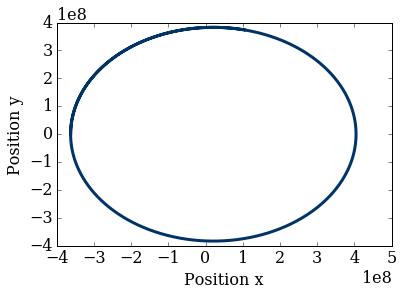

In [198]:
pyplot.plot(x, y, color='#003366', ls='-', lw=3)
pyplot.ylabel('Position y')
pyplot.xlabel('Position x')

In [199]:

RungeKutta4Lune(dua,ua,vxa,vya,xa,ya,axa,aya,x,y,n,dtb)

(array([  2.10648978e+07,   2.10643978e+07,   2.10638969e+07, ...,
          3.16309454e+10,   3.16309716e+10,   3.16309979e+10]),
 array([  0.00000000e+00,   5.00000000e+02,   9.99999996e+02, ...,
         -5.38963947e+10,  -5.38964394e+10,  -5.38964842e+10]),
 array([  -500.        ,   -500.89821758,   -501.79647782, ...,
         26256.3096189 ,  26256.30961885,  26256.30961879]),
 array([   500.        ,    499.99999645,    499.99997157, ...,
        -44737.98693153, -44737.98693144, -44737.98693135]),
 array([ -8.98206898e-01,  -8.98249540e-01,  -8.98292261e-01, ...,
         -5.22939976e-08,  -5.22939107e-08,  -5.22938239e-08]),
 array([  0.00000000e+00,  -2.13223906e-05,  -4.26478613e-05, ...,
          8.90929576e-08,   8.90928097e-08,   8.90926618e-08]))

(-5000000.0, 30000000)

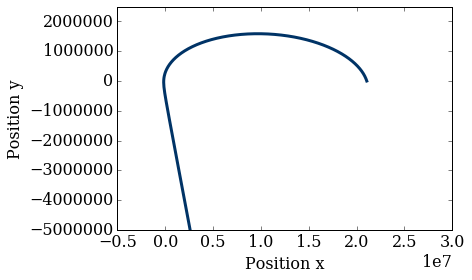

In [206]:
pyplot.plot(xa,ya , color='#003366', ls='-', lw=3)
pyplot.ylabel('Position y')
pyplot.xlabel('Position x')
pyplot.ylim(-0.5*10**7,2.5*10**6)
pyplot.xlim(-0.5*10**7,3*10**7)
 

Q6